<a href="https://colab.research.google.com/github/lionelalexandre/4TPU271/blob/main/S2_TD1_python_notebook_en_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:blue"> <center>Teacher / DS : 4TPU271 & 4TPU279U $-$ Licence 1ère année $-$ printemps 2023</center></span>
# <center>Méthodes numériques pour les Sciences</center>
# <hr style="border:1px solid black"><center>DS2 : Introduction à la programmation Python </center><hr style="border:1px solid black">
</br>

<span style="color:red"> A la fin de l'épreuve, déposer ce fichier **notebook** complété ou un fichier **python** édité via Spyder, sur la page
[Moodle](https://moodle1.u-bordeaux.fr/course/view.php?id=12271) consacrée à votre demi-groupe. </span>


<span style="color:red"> Renommer votre fichier suivant le protocole  </span>: 
- `DS2_NomPrenom_S2.ipynb` pour un fichier *jupyter-notebook*

ou 

- `DS2_NomPrenom_S2.py` pour un fichier *python* pur

<div class="alert alert-block alert-warning">
<b>ATTENTION :</b> Abolir totalement l’emploi des espaces, lettres accentuées et autres symboles
dans le nom du fichier !
</div>

**Les points suivants seront pris en compte pour l'évaluation :**
- respect des consignes
- mise en forme des figures (légendes, unités, titre etc...)
- clarté des programmes et mise en page

</br>
<div style="text-align: right"> Credits: R. Boisgard, L. Truflandier, Philippe Paillou, Julien Burgin, Sara Zein, Leo Delmarre, Simon Villain-Guillot, Louise Marinho </div>


## <hr style="border:1px solid black"> Exercice 1 : potentiel de Lennard-Jones et représentation graphique <hr style="border:1px solid black">

On souhaite étudier le potentiel de Lennard-Jones reliant 2 atomes d'Argon. Son expression est donnée par :

$$ V(x) = 4D_e \left( \left(\frac{\sigma}{x}\right)^{12} - \left(\frac{\sigma}{x}\right)^{6}\right)$$

où $x$ désigne la distance interatomique ; $D_e$ et $\sigma$ sont des paramètres du modèle.

On remarquera :
- $\lim_{x\rightarrow\infty}V(x) = 0 $
- $\frac {d V(x)}{dx} = 0$ pour $x = x_e = 2^{1/6}\sigma$ ; $x_e$ correspond à la distance d'équilibre des 2 atomes. 
- $V(x_e)= -D_e$ ; l'énergie potentielle est minimale en $x = x_e$ et vaut moins l'énergie de dissociation $D_e$.

Pour l'Argon on donne : $D_e = 0.0102$ eV, $\sigma=3.4$ Å.

1. Représenter graphiquement le potentiel de Morse. Respecter les consignes suivantes pour le tracé :
    - En utilisant la fonction `linspace`, représenter $V$ en fonction de $x$ pour $x\in[3.0,8.0]$ avec 256 point de discrétisation.
    - Légender les axes avec les unités.
    - Faire apparaître un axe horizontal en pointillé noir correspondant au zéro d'énergie potentielle.
    - Localiser $x_e$ par un cercle noir sur la courbe.
    - Le domaine du tracé sera borné : suivant l'axe des absisses de 3.0 à 8.0, et de -0.011 à 0.011
    suivant l'axe des ordonnées. Utiliser les fonctions `xlim` et `ylim` comme proposé ci-dessous.

In [1]:
import matplotlib.pyplot as plt
# Limites suivant x pour le tracé 
#plt.xlim( 3.0,8.0)

# Limites suivant y pour le tracé 
#plt.ylim(-0.011,0.011)

<span style="color:red">**solution :**</span>

In [2]:
from numpy import exp, linspace
from scipy.constants import e, Avogadro

# Rq: l'utilisation d'une fonction pour le potentiel de Morse n'est pas obligatoire
def pot_LJ(x,sigma,De):
    return 4*De*( (sigma/x)**12 - (sigma/x)**6 )

De     = 0.0102 # eV
sigma =  3.40   # Ang

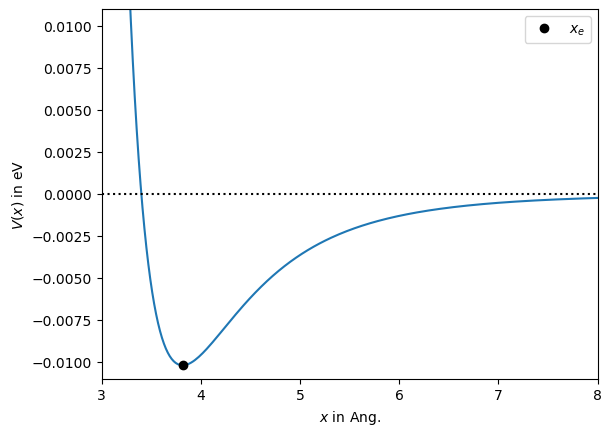

In [3]:
import matplotlib.pyplot as plt

x = linspace(3.0,8.0,256)
xe= 2**(1/6)*sigma

# Tracé du Potentiel de Morse 
V = pot_LJ(x,sigma,De)
plt.plot(x,V)

# Tracé de l'asymptote horizontale
De_plot = linspace(0,0,256)
plt.plot(x,De_plot,color='black',linestyle=':')

# Localisation de la distance d'équilibre
plt.plot(xe,-De,marker='o',linestyle='',color='black',label='$x_e$')

plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)$ in eV')

plt.xlim( 3.0,8.0)
plt.ylim(-0.011,+0.011)
plt.legend()

Pour des faibles variations de $x$ au voisinage de $x_e$, on peut assimiler le potentiel de Lennard-Jones à
l'énergie potentielle d'un oscillateur harmonique. Le développement au deuxième ordre de Taylor de $V(x)$ au voisinage the $x_e$ permet d'approximer $V(x)$ par :

$$ V_\text{harm}(x) = \frac{36 D_e}{2^{1/3}\sigma^2}(x-x_e)^2 -D_e$$

2. Reprendre le graphique précédent et ajouter le potentiel harmonique $V_\text{harm}(x)$. Faire afficher la légende de chaque graphique. Ne pas oublier de borner la représentation comme dans la question précédente. Légender les courbes.

<span style="color:red">**solution :**</span>

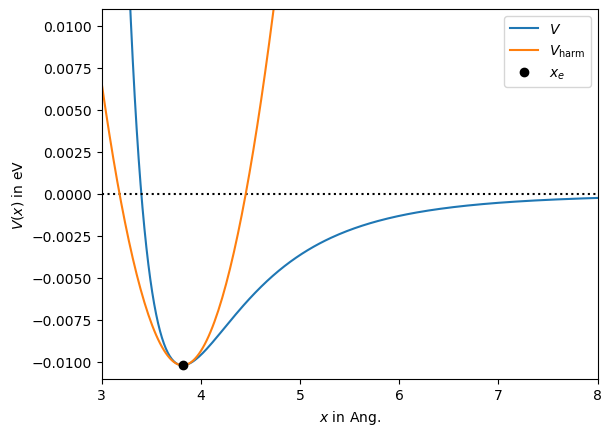

In [4]:
import matplotlib.pyplot as plt

x = linspace(3.0,8.0,256)
xe= 2**(1/6)*sigma

# Tracé du Potentiel de Morse 
V = pot_LJ(x,sigma,De)
plt.plot(x,V,label='$V$')

# Tracé de l'asymptote horizontale
De_plot = linspace(0,0,256)
plt.plot(x,De_plot,color='black',linestyle=':')

# Tracé du potentiel harmonique
V_harm = 36/2**(1/3)*De/sigma**2 * (x - xe)**2 - De
plt.plot(x,V_harm,label='$V_\mathrm{harm}$')

# Localisation de la distance d'équilibre
plt.plot(xe,-De,marker='o',linestyle='',color='black',label='$x_e$')

plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)$ in eV')

plt.xlim( 3.0,8.0)
plt.ylim(-0.011,0.011)
plt.legend()

3. Représenter l'écart $V(x) - V_\text{harm}(x)$ sur un nouveau graphique pour $x\in[1.95,2.05]$. Légender les axes.

<span style="color:red">**solution :**</span>

Text(0, 0.5, '$V(x)-V_\\mathrm{harm}(x)$ in eV')

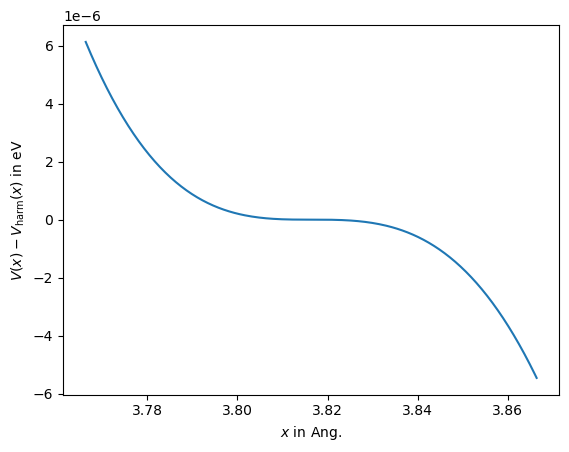

In [5]:
import matplotlib.pyplot as plt

x = linspace(3.81637-0.05,3.81637+0.05,256)
V = pot_LJ(x,sigma,De)
V_harm = 36/2**(1/3)*De/sigma**2 * (x - xe)**2 - De

plt.plot(x,V-V_harm)
plt.xlabel('$x$ in Ang.')
plt.ylabel('$V(x)-V_\mathrm{harm}(x)$ in eV')

<hr style="border:1px solid grey">

## <hr style="border:1px solid black"> Exercice 2 : résolution numérique des équations de la dynamique <hr style="border:1px solid black">

> On souhaite étudier le mouvement d'un des atome d'Argon soumis à la force dérivant du potentiel harmonique $V_\text{harm}(x)$ tel que : 

$$\vec{f}=-\frac{dV_\text{harm}}{dx}\:\vec{e}_x=-k(x-x_e)\:\vec{e}_x \quad\quad\text{(1)}$$

avec $$k=\frac{72 D_e}{2^{1/3}\sigma^2}$$

la constante de force de la liaison Ar$\cdots$Ar. 

Pour l'intégration numérique des équations du mouvement, on utilisera la méthode de Hooke-Newton décrite ci-dessous :

$$\begin{align}
x(t_{i+1}) &= x(t_i) + h\;v(t_i) \quad\quad\quad\quad\ \ \text{(2)}\\   
v(t_{i+1}) &= v(t_i)+\frac{h}m f\left(x(t_{i+1})\right)\quad\quad\text{(3)} \\ 
\end{align}$$

avec $m=39.95$ g/mol, la masse de l'atome Ar et $h$ le pas de temps en unité de temps réduite (utr ; 1 utr $\simeq 10^{-14}$ s)

1. A partir des constantes $\sigma$ et $D_e$ données précédemment, calculer la valeur de $k$ en eV$\cdot$Å$^{-2}$ et N$\cdot$m$^{-1}$.
Pour les conversions, on utilisera les constantes physiques de la librarie `scipy.constants`. Par la suite on prendra $k=0.0504$ eV$\cdot$Å$^{-2}$.

<span style="color:red">**solution :**</span>

In [6]:
from scipy.constants import e

De   =  0.0102# eV
sigma=  3.40  # Ang^-1

k = 72*De/(2**(1/3)*sigma**2)
print(' k = %.4f eV.Ang^-2'%k)

k = 72*De/(2**(1/3)*sigma**2) * e * (1e+10)**2
print(' k = %.3f N.m^-1'%k)

k = 72*De/(2**(1/3)*sigma**2)

 k = 0.0504 eV.Ang^-2
 k = 0.808 N.m^-1


2. Utiliser l'algorithme de Hooke-Newton pour simuler le déplacement de l'atome de Cl autour de sa position d'équilibre. Le temps d'étude sera de $t_\textrm{max}=4\pi\sqrt{m/k}=353.714$ utr, avec un pas de discrétisation $h=0.01$. On utilisera les conditions initiales :
- $x(t_0)=3.84$ Å 
- $v(t_0)=0$

***Pour vous guider reprendre les différentes étapes du TD4 données ci-dessous :***

> On commence par définir la force, cf. **équation (1)**, *via* une fonction `f`:

In [7]:
def f(x):
    xe = 2**(1/6)*sigma
    k  = 72*De/(2**(1/3)*sigma**2)
    return - k*(x - xe)

> On initialise la masse et on discrétise l'axe du temps :

In [8]:
from numpy import pi, arange, zeros, cos, sqrt

m = 39.95

tmin = 0.0
tmax = 2*pi*sqrt(m/k)*2
print('tmax = ', tmax)

h    = 0.01
t    = arange(tmin,tmax,h)

tmax =  353.71420785457383


> On initialise les tableaux pour $x$ et $v$ ainsi que les conditions initiales :

In [9]:
x = zeros(len(t))
v = zeros(len(t))

x0 = 3.84
v0 = 0.00

> On applique la relation de récurrence de Hooke-Newton à $x$ et à $v$ :

In [10]:
x[0] = x0
v[0] = v0
for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*f(x[i+1])/m

> Sauvegarder la position $x$ et la vitesse $v$ dans 2 tableaux `x_harm` et `v_harm` pour une utilisation ultérieure

In [11]:
x_harm = x
v_harm = v

> Tracer des lois horaires $x(t)$ et $v(t)$ sur 2 figures différentes

Text(0, 0.5, '$x(t)$ (in Ang)')

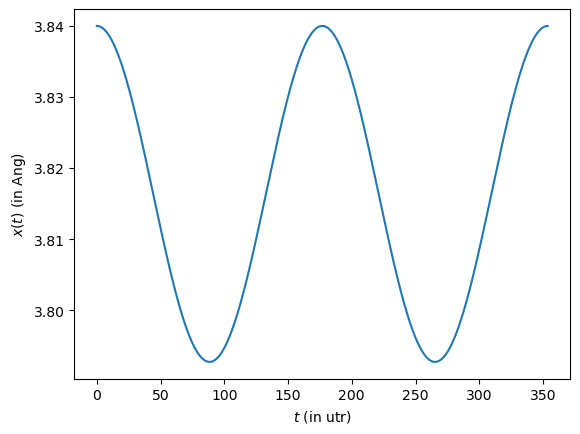

In [12]:
import matplotlib.pylab as plt

plt.plot(t,x,marker='')
plt.xlabel('$t$ (in utr)')
plt.ylabel('$x(t)$ (in Ang)')

Text(0, 0.5, '$v(t)$ (in Ang)')

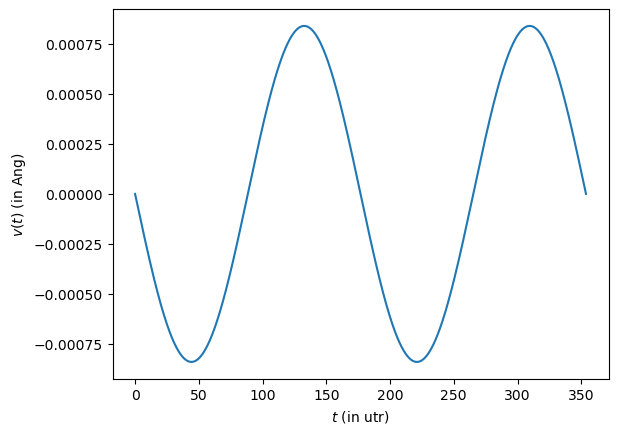

In [13]:
plt.plot(t,v,marker='')
plt.xlabel('$t$ (in utr)')
plt.ylabel('$v(t)$ (in Ang)')

> Tracer du portrait de phase $(x(t),v(t))$ et repérage des conditions initiales :

Text(0, 0.5, '$v(t)$')

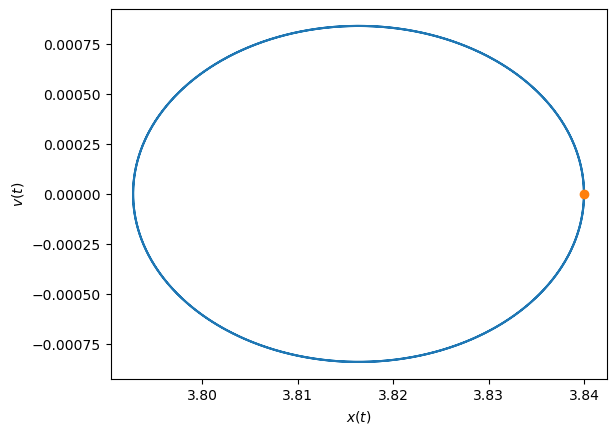

In [14]:
plt.plot(x,v,marker='')
plt.plot(x0,v0,marker='o')
plt.xlabel('$x(t)$')
plt.ylabel('$v(t)$')

3. Reprendre la résolution des équations de la dynamique pour une force dérivant du potentiel de Lennard-Jones. L'expression est donnée ci-dessous :
$$\vec{f}=-\frac{dV}{dx}\:\vec{e}_x=-\frac{24 D_e\sigma^6}{x^7}\left(1-\frac{2\sigma^6}{x^6}\right)\:\vec{e}_x$$

> On commence par définir la force, cf. **équation (4)**, *via* une fonction `f`:

In [15]:
from numpy import exp

def f(x):
    return - 24*De*sigma**6/x**7 * (1 - 2*sigma**6/x**6) 

> On initialise la masse et on discrétise l'axe du temps :

In [16]:
from numpy import pi, arange, zeros, cos, sqrt

m = 39.95

tmin = 0.0
tmax = 2*pi*sqrt(m/k)*2

h    = 0.01
t    = arange(tmin,tmax,h)

> On initialise les tableaux pour $x$ et $v$ ainsi que les conditions initiales :

In [17]:
x = zeros(len(t))
v = zeros(len(t))

x0 = 3.84
v0 = 0.0

> On applique la relation de récurrence de Hooke-Newton à $x$ et à $v$ :

In [18]:
x[0] = x0
v[0] = v0
for i in range(len(t)-1):
    x[i+1] = x[i] + h*v[i]
    v[i+1] = v[i] + h*f(x[i+1])/m

> Sauvegarder la position $x$ et la vitesse $v$ dans 2 tableaux `x_morse` et `v_morse`.

In [19]:
x_morse = x
v_morse = v

> Tracer des lois horaires $x_\text{harm}(t)$ et $v_\text{harm}(t)$ ainsi que $x_\text{morse}(t)$ et $v_\text{morse}(t)$

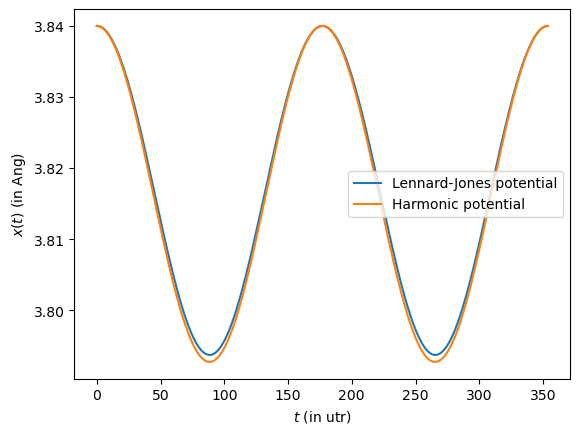

In [20]:
import matplotlib.pylab as plt

plt.plot(t,x_morse,marker='',label='Lennard-Jones potential')
plt.plot(t,x_harm,marker='', label='Harmonic potential')


plt.xlabel('$t$ (in utr)')
plt.ylabel('$x(t)$ (in Ang)')
plt.legend()

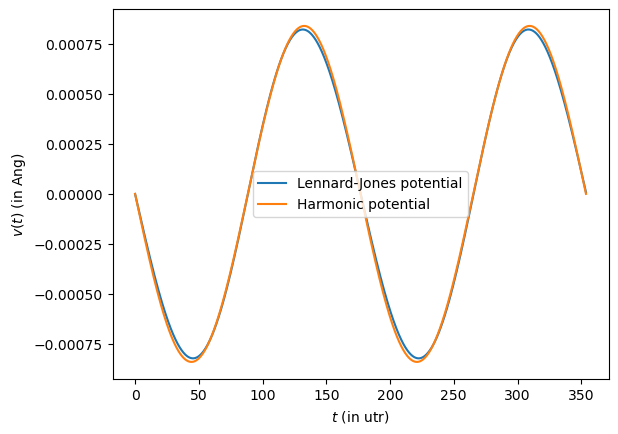

In [21]:
plt.plot(t,v_morse,marker='',label='Lennard-Jones potential')
plt.plot(t,v_harm,marker='', label='Harmonic potential')


plt.xlabel('$t$ (in utr)')
plt.ylabel('$v(t)$ (in Ang)')
plt.legend()

> Tracer des portraits de phase $(x_\text{harm}(t)v_\text{harm}(t))$ et $(x_\text{morse}(t)v_\text{morse}(t))$ et repérer des conditions initiales :

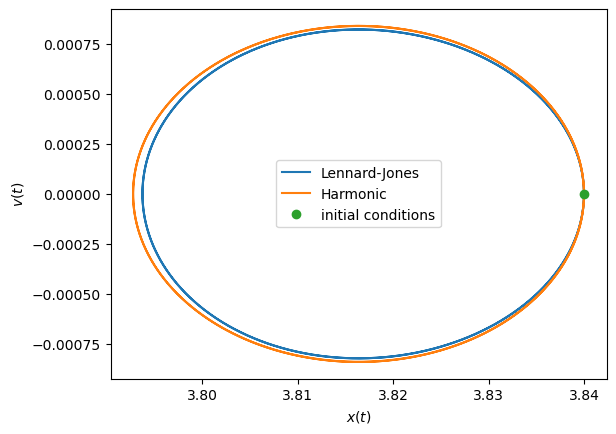

In [22]:
plt.plot(x_morse,v_morse,marker='',label='Lennard-Jones')
plt.plot(x_harm,v_harm,  marker='',label='Harmonic')

plt.plot(x0,v0,marker='o',linestyle='',label='initial conditions')
plt.xlabel('$x(t)$')
plt.ylabel('$v(t)$')
plt.legend()

4. Reprendre les questions 2. et 3. avec les conditions initiales :
- $x(t_0)=4.5$ Å 
- $v(t_0)=0$

## <hr style="border:1px solid black"> Exercice bonus : double factoriel (impair) <hr style="border:1px solid black">

Pour un entier $n$ **impair**, le double factoriel, $n!!$, est donné par :

$$\sum^{\frac{n+1}{2}}_{k=1}(2k-1)=1\times3\times\cdots(n-4)(n-2)n$$

Ecrire un programme permettant le calcul de $n!!$. Tester votre programme avec $n=13$ et comparer au résultat
obtenu avec la fonction `factorial2()` de la librairie `scipy`.

<span style="color:red">**solution :**</span>

In [23]:
from scipy.special import factorial2

n = 13

fact2 = 1
for k in range(1,int((n+1)/2)+1):
    fact2 = fact2*(2*k-1)

print(fact2)
print(factorial2(n))

135135
135135.00000000003
